<a href="https://colab.research.google.com/github/Bellladraf6/machine-learning-labs/blob/main/LabTimeSeriesLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Шаг 1: Создание синтетического временного ряда

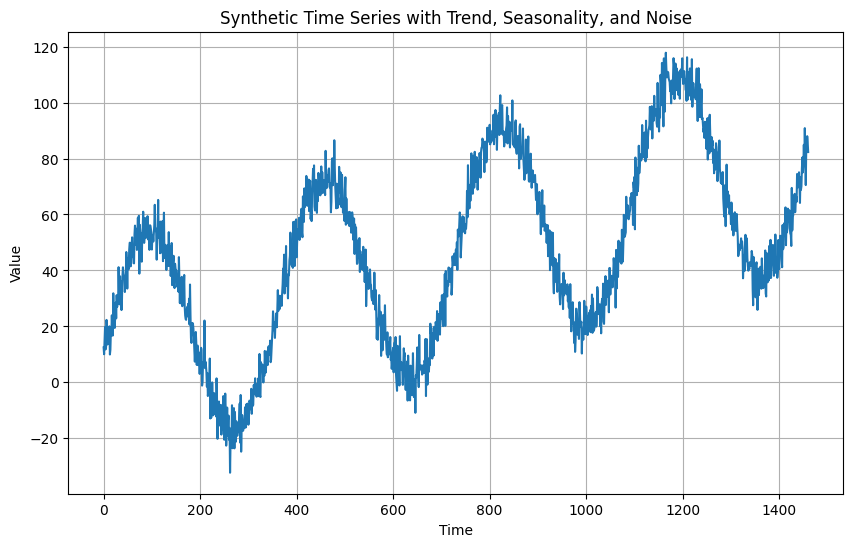

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Генерация временного ряда
np.random.seed(42)
time = np.arange(0, 4 * 365 + 1)
baseline = 10
slope = 0.05
series = baseline + slope * time

# Добавляем сезонность
amplitude = 40
season_time = (time % 365) / 365
seasonality = amplitude * np.sin(2 * np.pi * season_time)

# Добавляем шум
noise_level = 5
noise = np.random.randn(len(time)) * noise_level

# Итоговый временной ряд
series += seasonality + noise

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(time, series)
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Synthetic Time Series with Trend, Seasonality, and Noise")
plt.grid(True)
plt.show()


# Шаг 2: Подготовка набора данных
Создадим функцию windowed_dataset, которая преобразует временной ряд в набор данных из признак-векторов и меток.

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

import tensorflow as tf

window_size = 30
batch_size = 32
shuffle_buffer = 1000

dataset = windowed_dataset(series, window_size, batch_size, shuffle_buffer)


# Шаг 3: Подготовка тренировочного и валидационного наборов данных
Разделим данные на тренировочный и валидационный наборы.

In [ ]:
split_time = int(len(series) * 0.8)
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer)
valid_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer)


# Шаг 4: Создание однослойной нейронной сети
Создадим и обучим однослойную нейронную сеть.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9))
history = model.fit(train_set, epochs=100, validation_data=valid_set)


Epoch 1/100
36/36 [==============================] - 1s 8ms/step - loss: nan - val_loss: nan
Epoch 2/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 3/100
36/36 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 4/100
36/36 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 6/100
36/36 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 7/100
36/36 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 8/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 9/100
36/36 [==============================] - 1s 18ms/step - loss: nan - val_loss: nan
Epoch 10/100
36/36 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 11/100
36/36 [==============================] - 0s 4ms/step - 

# Шаг 5: Настройка модели
Попробуем настроить сеть, чтобы её среднеквадратичная ошибка была не больше 5.0.

In [ ]:
def adjust_learning_rate():
    learning_rate = 1e-5
    for i in range(10):
        model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=learning_rate, momentum=0.9))
        history = model.fit(train_set, epochs=100, validation_data=valid_set)
        mse = model.evaluate(valid_set)
        if mse < 5.0:
            print(f"Achieved MSE < 5.0 with learning rate: {learning_rate}")
            break
        learning_rate *= 10

adjust_learning_rate()


Epoch 1/100
36/36 [==============================] - 1s 20ms/step - loss: nan - val_loss: nan
Epoch 2/100
36/36 [==============================] - 1s 15ms/step - loss: nan - val_loss: nan
Epoch 3/100
36/36 [==============================] - 1s 18ms/step - loss: nan - val_loss: nan
Epoch 4/100
36/36 [==============================] - 1s 24ms/step - loss: nan - val_loss: nan
Epoch 5/100
36/36 [==============================] - 1s 12ms/step - loss: nan - val_loss: nan
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 7/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 8/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 9/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 10/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 11/100
36/36 [==============================] - 0s 4ms/ste

Epoch 1/100
36/36 [==============================] - 1s 7ms/step - loss: nan - val_loss: nan
Epoch 2/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 3/100
36/36 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 6/100
36/36 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 7/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 8/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 9/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 10/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 11/100
36/36 [==============================] - 0s 9ms/step - l

Epoch 1/100
36/36 [==============================] - 1s 10ms/step - loss: nan - val_loss: nan
Epoch 2/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 7/100
36/36 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 8/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 9/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 10/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 11/100
36/36 [==============================] - 0s 4ms/step - 

Epoch 1/100
36/36 [==============================] - 1s 7ms/step - loss: nan - val_loss: nan
Epoch 2/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 6/100
36/36 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 7/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 8/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 9/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 10/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 11/100
36/36 [==============================] - 0s 4ms/step - l

Epoch 1/100
36/36 [==============================] - 1s 7ms/step - loss: nan - val_loss: nan
Epoch 2/100
36/36 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 4/100
36/36 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 6/100
36/36 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 7/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 8/100
36/36 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 9/100
36/36 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 10/100
36/36 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 11/100
36/36 [==============================] - 0s 4ms/step - l

Epoch 1/100
36/36 [==============================] - 1s 9ms/step - loss: nan - val_loss: nan
Epoch 2/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 4/100
36/36 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 7/100
36/36 [==============================] - 0s 7ms/step - loss: nan - val_loss: nan
Epoch 8/100
36/36 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 9/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 10/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 11/100
36/36 [==============================] - 0s 4ms/step - l

Epoch 1/100
36/36 [==============================] - 1s 7ms/step - loss: nan - val_loss: nan
Epoch 2/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 5/100
36/36 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 7/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 8/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 9/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 10/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 11/100
36/36 [==============================] - 0s 4ms/step - l

Epoch 1/100
36/36 [==============================] - 1s 12ms/step - loss: nan - val_loss: nan
Epoch 2/100
36/36 [==============================] - 1s 10ms/step - loss: nan - val_loss: nan
Epoch 3/100
36/36 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 6/100
36/36 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 7/100
36/36 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 8/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 9/100
36/36 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 10/100
36/36 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 11/100
36/36 [==============================] - 0s 5ms/step -

Epoch 1/100
36/36 [==============================] - 1s 10ms/step - loss: nan - val_loss: nan
Epoch 2/100
36/36 [==============================] - 0s 7ms/step - loss: nan - val_loss: nan
Epoch 3/100
36/36 [==============================] - 1s 10ms/step - loss: nan - val_loss: nan
Epoch 4/100
36/36 [==============================] - 1s 9ms/step - loss: nan - val_loss: nan
Epoch 5/100
36/36 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 7/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 8/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 9/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 10/100
36/36 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 11/100
36/36 [==============================] - 0s 5ms/step -

Epoch 1/100
36/36 [==============================] - 1s 7ms/step - loss: nan - val_loss: nan
Epoch 2/100
36/36 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 3/100
36/36 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 4/100
36/36 [==============================] - 0s 8ms/step - loss: nan - val_loss: nan
Epoch 5/100
36/36 [==============================] - 1s 9ms/step - loss: nan - val_loss: nan
Epoch 6/100
36/36 [==============================] - 1s 10ms/step - loss: nan - val_loss: nan
Epoch 7/100
36/36 [==============================] - 1s 9ms/step - loss: nan - val_loss: nan
Epoch 8/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 9/100
36/36 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 10/100
36/36 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 11/100
36/36 [==============================] - 0s 4ms/step - 